In [1]:
# Importing libreries : 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno
from typing import List
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Step1 : Load and Familiarizing with Data

## a: Loading DataSet

In [2]:
def load_csv(filename):
    return pd.read_csv(f'/kaggle/input/competitive-data-science-predict-future-sales/{filename}.csv')

# Load the CSV files using the function
data_items = load_csv('items')
data_sample_submissions = load_csv('sample_submission')
data_item_categories = load_csv('item_categories')
data_sales = load_csv('sales_train')
data_shops = load_csv('shops')
data_test = load_csv('test')

## b : Familiarizing with Data

### Items

In [3]:
data_items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [4]:
data_items.describe()

,item_id,item_category_id
count,22170.00000,22170.000000
mean,11084.50000,46.290753
std,6400.07207,15.941486
min,0.00000,0.000000
25%,5542.25000,37.000000
50%,11084.50000,40.000000
75%,16626.75000,58.000000
max,22169.00000,83.000000


In [5]:
data_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


### sample_submission

In [6]:
data_sample_submissions.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [7]:
data_sample_submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              214200 non-null  int64  
 1   item_cnt_month  214200 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.3 MB


### item_categories

In [8]:
data_item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
data_item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


### sales_train

In [10]:
data_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [11]:
data_sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [12]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


## Shops

In [13]:
data_shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [14]:
data_shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


### Test

In [15]:
data_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [16]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


# Step 2: Initial Data Profiling 

* ## a : checking Missing value
* ## b : checking Duplicate
* ## c : checking Outlier

##

## checking Missing value¶

### Data sets to be reviewed:
- `data_items`
- `data_item_categories`
- `data_sales`
- `data_shops`

**Note**:  
The `sample` and `test` data sets are excluded from this review. The `sample` set was created solely for illustrative purposes, while the `test` set is designed for evaluating the results. Missing values in these sets are considered intentional and meaningful.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt


# Dictionary to simulate your actual data structure
List_dataset_missingval_check = [data_items, data_item_categories, data_sales, data_shops]
lst_names = ['data_items', 'data_item_categories', 'data_sales', 'data_shops']

# Initialize the graph

# Iteratively add dataset names and columns to the graph with missing values
for df, name in zip(List_dataset_missingval_check, lst_names):
    print('  ')
    print(f"{name} =>")
    

    
    # Iterate over each column (key) and its missing value count
    for column_name, missing_count in df.isnull().sum().items():
        print(f"    {column_name}: {missing_count} missing values")
        



  
data_items =>
    item_name: 0 missing values
    item_id: 0 missing values
    item_category_id: 0 missing values
  
data_item_categories =>
    item_category_name: 0 missing values
    item_category_id: 0 missing values
  
data_sales =>
    date: 0 missing values
    date_block_num: 0 missing values
    shop_id: 0 missing values
    item_id: 0 missing values
    item_price: 0 missing values
    item_cnt_day: 0 missing values
  
data_shops =>
    shop_name: 0 missing values
    shop_id: 0 missing values


**There are no missing values in the dataset listed above (prior to merging).**


* ## b : checking Duplicate

In [18]:
# Making list of data and name
List_name_dfs =['items',
'sample_submission',
'item_categories',
'sales_train',
'shops',
'test']

List_dfs = [data_items,
data_sample_submissions,
data_item_categories,
data_sales,
data_shops,
data_test]

In [19]:

# Updated version of Duplicated :

def check_duplicate(DF_LST: List[pd.DataFrame], Name_LST: List[str]) ->[pd.DataFrame, dict]:
    summary = {}
    duplicate_rows = {}
    
    for df, name in zip(DF_LST, Name_LST):
        # Count the total number of duplicate rows (including first occurrences)
        num_duplicated = df[df.duplicated(keep=False)].shape[0]
        
        # Store the number of duplicates in the summary dictionary
        summary[name] = num_duplicated
        
        # Get the actual duplicate rows and store them in the duplicate_rows dictionary
        dup_rows = df[df.duplicated(keep=False)]
        duplicate_rows[name] = dup_rows
    
    # Create a summary DataFrame
    dup_sum = pd.DataFrame.from_dict(summary, orient='index', columns=['Duplicate Rows'])
    
    return dup_sum, duplicate_rows

In [20]:
check_duplicate(List_dfs , List_name_dfs)

(                   Duplicate Rows
 items                           0
 sample_submission               0
 item_categories                 0
 sales_train                    12
 shops                           0
 test                            0,
 {'items': Empty DataFrame
  Columns: [item_name, item_id, item_category_id]
  Index: [],
  'sample_submission': Empty DataFrame
  Columns: [ID, item_cnt_month]
  Index: [],
  'item_categories': Empty DataFrame
  Columns: [item_category_name, item_category_id]
  Index: [],
  'sales_train':                date  date_block_num  shop_id  item_id  item_price  \
  76961    05.01.2013               0       54    20130       149.0   
  76962    05.01.2013               0       54    20130       149.0   
  1435365  23.02.2014              13       50     3423       999.0   
  1435367  23.02.2014              13       50     3423       999.0   
  1496765  23.03.2014              14       21     3423       999.0   
  1496766  23.03.2014              14  

## Handling Duplicated Values in Sales Data

There are two assumptions regarding duplicated values in the sales data:

1. **Missed Records**: The row may have been recorded by mistake.
2. **Repeated Sales**: The same item may have been sold more than once from the same shop.

To avoid losing information by deleting duplicate rows, the approach will involve aggregating the data based on the `item_cnt_day` column.


In [21]:
data_sales = data_sales.groupby(['date','date_block_num','shop_id','item_id','item_price'],as_index= False).agg({'item_cnt_day':'sum'})


**A function has been added above for the ETL process.**


* ## c : checking Outlier 

**This section focuses on analyzing the distribution of numeric values and identifying outliers.**


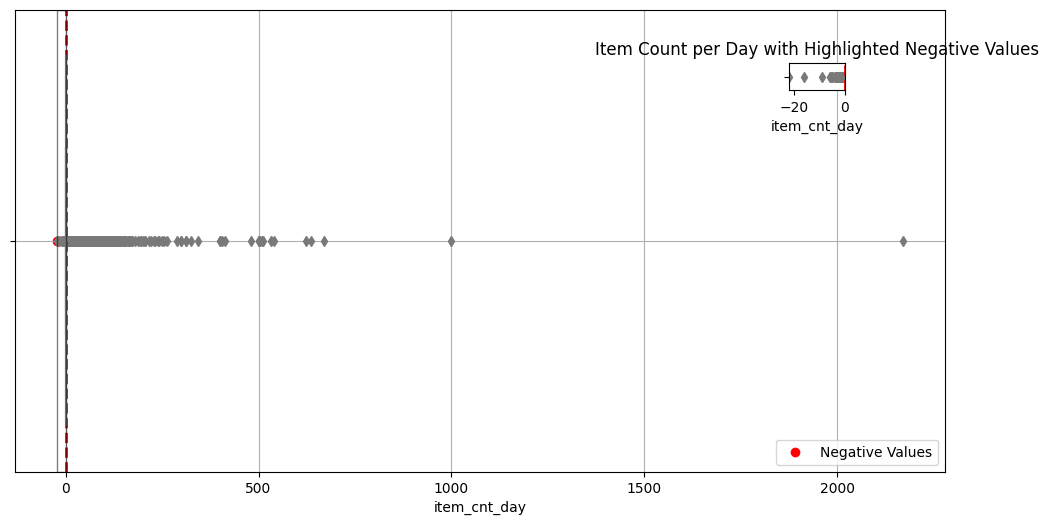

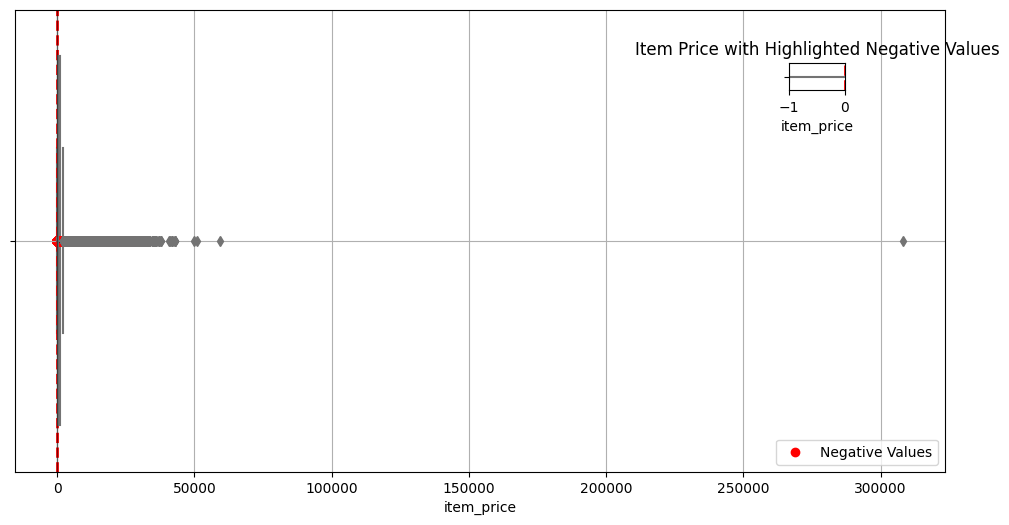

In [22]:



# Create a mask for negative values
mask_neg_price = data_sales.item_price < 0
mask_neg_count = data_sales.item_cnt_day < 0

# Define the zoom region for negative values
def plot_with_zoom(ax, data, mask, xlabel, title, color):
    # Plot main figure
    sns.boxplot(x=data, color=color, ax=ax)
    ax.axvline(x=0, color='red', linestyle='--', linewidth=2)  # Vertical line at zero
    
    # Plot Negative point with different color :
    
    negative_counts = data[mask_neg_count]
    ax.scatter(negative_counts, np.zeros_like(negative_counts), color='red', label='Negative Values')
    ax.legend(loc ='lower right')
    ax.grid(True)
    
    # Create inset
    zoom_region = [data[mask].min(), 0]  # Define the zoom region for negative values
    axins = inset_axes(ax, width="30%", height="30%", loc='upper right', bbox_to_anchor=(0.7, 0.7, 0.2, 0.2), bbox_transform=ax.transAxes)
    
    # Plot in the inset
    sns.boxplot(x=data, color=color, ax=axins)
    axins.axvline(x=0, color='red', linestyle='--', linewidth=2)
    axins.set_xlim(zoom_region)  # Set x-axis limits to zoom in on the negative values
    axins.set_ylim(-0.5, 0.5)  # Adjust y-axis limits to ensure visibility
    
    # Indicate zoom region on the main plot
    ax.indicate_inset_zoom(axins, edgecolor='black')
    
    return ax, axins

# Plot for item_count_day with zoomed negative values
plt.figure(figsize=(12, 6))
ax1 = plt.gca()
ax1, ax1ins = plot_with_zoom(ax1, data_sales.item_cnt_day, mask_neg_count, 'Item Count per Day', 'Item Count per Day with Highlighted Negative Values', 'lightblue')
plt.title('Item Count per Day with Highlighted Negative Values')
plt.show()

# Plot for item_price with zoomed negative values
plt.figure(figsize=(12, 6))
ax2 = plt.gca()
ax2, ax2ins = plot_with_zoom(ax2, data_sales.item_price, mask_neg_price, 'Item Price', 'Item Price with Highlighted Negative Values', 'lightgreen')
plt.title('Item Price with Highlighted Negative Values')
plt.show()

In [23]:
data_sales[mask_neg_price]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1371227,15.05.2013,4,32,2973,-1.0,1.0


In [24]:
data_sales[mask_neg_count]

print(f'Percentage of negative sale price in whole sale dataframe: {(len(data_sales[mask_neg_price]) / len(data_sales)) * 100:.5f}%')

Percentage of negative sale price in whole sale dataframe: 0.00003%


**The graph above indicates the presence of negative item prices and item count per day. The view has been zoomed out to better understand the range and distribution of these values.**


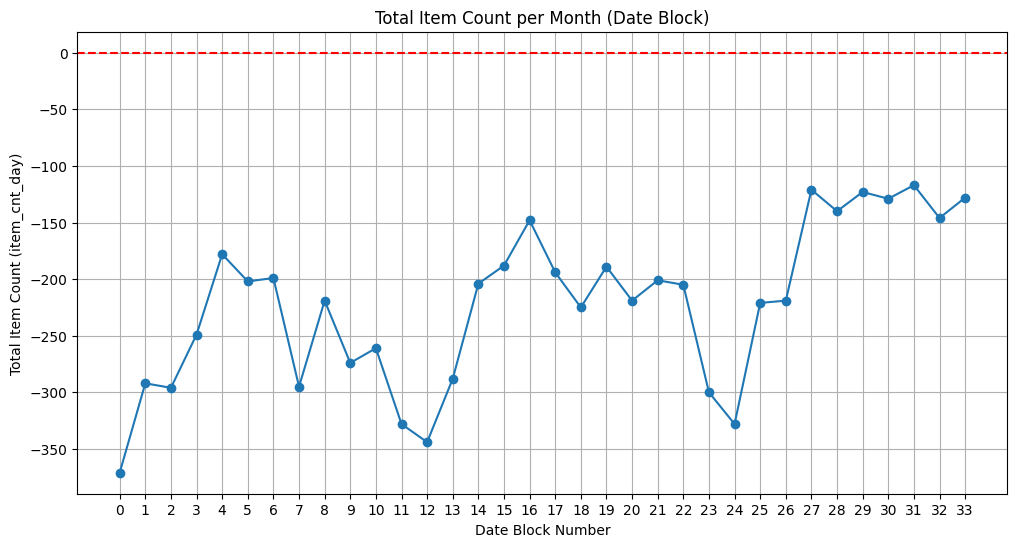

In [75]:
# Grouping by 'date_block_num' and aggregating the sum of 'item_cnt_day'
monthly_sales_negative_item = data_sales[mask_neg_count].groupby('date_block_num')['item_cnt_day'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_negative_item['date_block_num'], monthly_sales_negative_item['item_cnt_day'], marker='o', linestyle='-')
plt.title('Total Item Count per Month (Date Block)')
plt.xlabel('Date Block Number')
plt.ylabel('Total Item Count (item_cnt_day)')
plt.xticks(monthly_sales_negative_item['date_block_num'])  # Set x-ticks to be the date blocks
plt.axhline(0, color='red', linestyle='--')  # Line at y=0 for reference
plt.grid()
plt.show()

>**The item counts are not specific to a particular month and appear across several months, which suggests that not all negative values are necessarily recording errors. For further analysis, the frequency of different negative item_cnt_day values will be examined. Dimensionality reduction algorithms will be applied to help identify potential errors more effectively.**

In [58]:
data_sales[mask_neg_count]['item_cnt_day'].value_counts()

item_cnt_day
-1.0     7252
-2.0       78
-3.0       14
-5.0        4
-4.0        3
-6.0        2
-22.0       1
-16.0       1
-9.0        1
Name: count, dtype: int64

> 

/tmp/ipykernel_36/961261854.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_counts['cluster'] = cluster_labels
/tmp/ipykernel_36/961261854.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], range(len(X)), c=colors, s=50, cmap='viridis', label='Clusters')


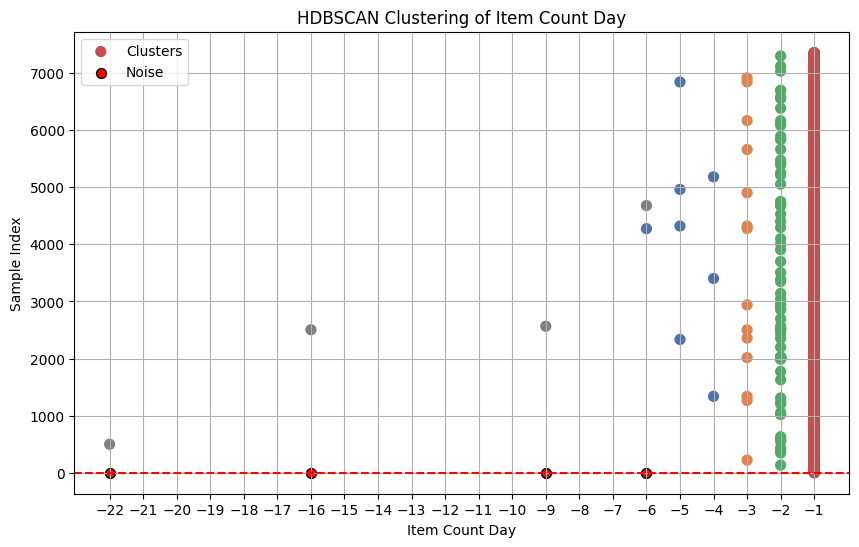

In [79]:
import hdbscan
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'negative_counts' is your DataFrame and you're clustering on 'item_cnt_day'
X = negative_counts[['item_cnt_day']].values

# Scale the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit HDBSCAN with adjusted parameters
clusterer = hdbscan.HDBSCAN(min_samples=5, min_cluster_size= 5) 
cluster_labels = clusterer.fit_predict(X_scaled)

# Assign the cluster labels back to the DataFrame
negative_counts['cluster'] = cluster_labels

# Create a scatter plot of the data points, colored by their cluster
plt.figure(figsize=(10, 6))

# Define color palette for different clusters
palette = sns.color_palette('deep', np.unique(cluster_labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in cluster_labels]

# Plot the data points
plt.scatter(X[:, 0], range(len(X)), c=colors, s=50, cmap='viridis', label='Clusters')

# Highlight noise points (cluster = -1)
plt.scatter(X[cluster_labels == -1, 0], range(len(X[cluster_labels == -1])), 
            c='red', s=50, label='Noise', edgecolor='k')

# Add titles and labels
plt.title("HDBSCAN Clustering of Item Count Day")
plt.xlabel("Item Count Day")
plt.ylabel("Sample Index")

# Set x-axis ticks to have a difference of 1
plt.xticks(np.arange(min(X[:, 0]), max(X[:, 0]) + 1, 1))

# Add grid
plt.grid(True)

plt.axhline(0, color='r', linestyle='--')  # Optional horizontal line for reference

plt.legend()
plt.show()


>**Based on the frequency of item_cnt and the implementation of HDBSCAN, it can be assumed that negative values below -6 are considered errors, while the rest are likely valid.**

**Checking the index of outlier :**

In [25]:
print(f'The outlier of item_cnt_day will be = {data_sales["item_id"][data_sales["item_cnt_day"] > 500].unique()}')
print(f'The outlier of item_price  will be = {data_sales["item_id"][data_sales["item_price"] > 50000].unique()}')

The outlier of item_cnt_day will be = [ 9242 19437  3731 20949 11373  8057  9248  9249]
The outlier of item_price  will be = [ 6066 11365 13199]


## Consistency : 

**This section focuses on checking the consistency of data formats across different datasets.**


In [26]:
def inspect_dtype(DF_LST : List[pd.DataFrame], Name_lST : List [str]) -> pd.DataFrame :
    report  = {}
    for  df_name , df in zip (Name_lST , DF_LST) :
        dtype = df.infer_objects().dtypes.astype('str')
        report[df_name] = dtype
        
        result = pd.DataFrame.from_dict(report, orient ='index').fillna('_')
        
    return result

In [27]:
Consistency_Check =inspect_dtype(List_dfs , List_name_dfs) 
Consistency_Check

,item_name,item_id,item_category_id,ID,item_cnt_month,item_category_name,date,date_block_num,shop_id,item_price,item_cnt_day,shop_name
items,object,int64,int64,_,_,_,_,_,_,_,_,_
sales_train,_,int64,_,_,_,_,object,int64,int64,float64,float64,_
test,_,int64,_,int64,_,_,_,_,int64,_,_,_
item_categories,_,_,int64,_,_,object,_,_,_,_,_,_
sample_submission,_,_,_,int64,float64,_,_,_,_,_,_,_
shops,_,_,_,_,_,_,_,_,int64,_,_,object


**This table displays the data types of different columns across various initial datasets, allowing for comparison of data types in similar columns.**


# Check consistency of Date (Time Series ) :

In [28]:
# Converting date from obj -> datetime format : 
from dateutil.parser import isoparse

def check_iso(date_str) :
    
    try :
        isoparse(date_str)
        return True
    except ValueError:
        return False

# Create data frame to check if time is ISO or not  :

df_iso  = pd.DataFrame()

df_iso['is_iso']  = data_sales['date'].apply(check_iso)

df_iso.value_counts()

is_iso
False     2935843
Name: count, dtype: int64

> **None of these  date are in ISO8601 format so it make it  impossible to use format = ISO8601 to convert them to datetime object**

In [29]:
from datetime import datetime

def check_date_format (date_str , date_format = '%d.%m.%Y'):
    
    try:
        datetime.strptime( date_str ,  date_format)
        return True
    except ValueError :
        
        return False
    
    
df_iso['Correct_format'] = data_sales['date'].apply(lambda x : check_date_format(x))

In [30]:
df_iso.value_counts()

is_iso  Correct_format
False   True              2935843
Name: count, dtype: int64

> **Yes all the date time has the  format  '%d.%m.%Y'**

>**The data can now be easily converted to the datetime format.**


In [31]:
data_sales['date'] = pd.to_datetime(data_sales['date'],format='%d.%m.%Y' )

## To Check Consistency

**The data will be divided by year, month, and day. Visualizations will then be performed for each of these time periods to assess consistency.**


In [32]:
# Extract year, month, and day
data_sales['year'] = data_sales['date'].dt.year
data_sales['month'] = data_sales['date'].dt.month
data_sales['day'] = data_sales['date'].dt.day

In [33]:
yearly_sales = data_sales.groupby('year')['item_cnt_day'].sum()
monthly_sales = data_sales.groupby(['year', 'month'])['item_cnt_day'].sum().reset_index()
daily_sales = data_sales.groupby(['year', 'month', 'day'])['item_cnt_day'].sum().reset_index()


# Checking Sales Consistency per Year


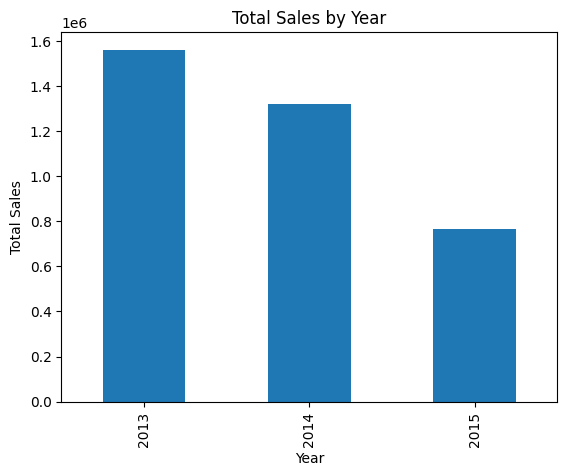

In [34]:
# Checking per year : 


yearly_sales.plot(kind='bar')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


# 

# Checking sale Consistency per month


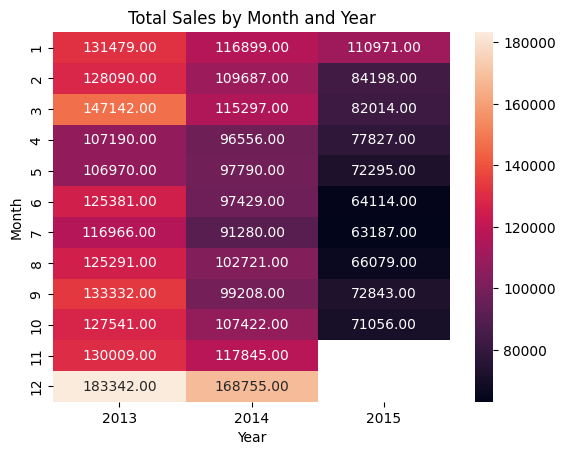

In [35]:

pivot_monthly = monthly_sales.pivot(index='month', columns='year', values='item_cnt_day')

# Plot heatmap
sns.heatmap(pivot_monthly, annot=True, fmt='0.2f')
plt.title('Total Sales by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


# Handling Daily Data

Given that visualizing daily data can result in a cluttered graph, a tabular comparison has been chosen for convenience and clarity.


In [36]:
# Define the range of dates
start_date = data_sales['date'].min()
end_date = data_sales['date'].max()
all_dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a DataFrame with all possible dates
all_dates_df = pd.DataFrame({
    'date': all_dates
})
all_dates_df['year'] = all_dates_df['date'].dt.year
all_dates_df['month'] = all_dates_df['date'].dt.month
all_dates_df['day'] = all_dates_df['date'].dt.day

In [37]:
# Merge with the original DataFrame to find missing dates
merged_df_date = pd.merge(all_dates_df, data_sales, on=['year', 'month', 'day'], how='left', indicator=True)
missing_dates = merged_df_date[merged_df_date['_merge'] == 'left_only']

# Display missing dates
print(missing_dates[['year', 'month', 'day']])


Empty DataFrame
Columns: [year, month, day]
Index: []


In [38]:
data_sales[data_sales['item_cnt_day']==0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day


**Observation on Time Interval and Item Count**

It can be observed that there are no missing days in the time interval of this DataFrame. Additionally, there are no instances where the `item_cnt_day` value is equal to zero. However, the presence of negative values has been addressed in the Outlier section.


# Categorical data Consistency check  :

## Summary of Datasets inorder to merge : 


### 1. `item_cat` DataFrame:
- `item_cat_name`
- `item_cat_id`

### 2. `item` DataFrame:
- `item_cat_name`
- `item_cat_id`

### 3. `sale` DataFrame:
- `shop_id`
- `item_id`

### 4. `shop` DataFrame:
- `shop_id`
- `shop_name`

### 5. `test set` DataFrame:
- `shop_id`
- `item_id`

Each dataset contains columns that can be used for merging:
- `item_cat_id` in both `item_cat` and `item`
- `shop_id` in both `sale` and `shop`

In [39]:
merged_item_itemcat = pd.merge(data_item_categories ,  data_items , on ='item_category_id' ,how ='outer',indicator= True)
merged_item_itemcat

,item_category_name,item_category_id,item_name,item_id,_merge
0,PC - Гарнитуры/Наушники,0,PC: Гарнитура HyperX Cloud Core игровая стерео...,5441,both
1,PC - Гарнитуры/Наушники,0,Наушники PHILIPS SBC HC8680,16255,both
2,PC - Гарнитуры/Наушники,0,Наушники RITMIX RH-120,16256,both
3,PC - Гарнитуры/Наушники,0,Наушники RITMIX RH-124 Black,16257,both
4,Аксессуары - PS2,1,PS2: Карта памяти 8 Мб черная (Memory Card 8Mb...,5606,both
...,...,...,...,...,...
22165,Элементы питания,83,Элемент питания GP 15AU (LR6) - Блистер 2 шт U...,22095,both
22166,Элементы питания,83,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096,both
22167,Элементы питания,83,Элемент питания GP 24AU (LR03) - Блистер 2 шт ...,22097,both
22168,Элементы питания,83,Элемент питания КОСМОС LR03 2*BL,22098,both


In [40]:
merged_item_itemcat['_merge'].value_counts()

_merge
both          22170
left_only         0
right_only        0
Name: count, dtype: int64

**All `item_cat_id` and `item_cat_name` values in these dataframes match each other.**


In [41]:
# Delete _merge column in order to use indicator in merging next data frame :

merged_item_itemcat.drop('_merge' ,axis= 1, inplace =True )

In [42]:
sale_item_cat_merged = pd.merge(merged_item_itemcat , data_sales ,
                               on ='item_id',how ='outer' , indicator= True)
sale_item_cat_merged

,item_category_name,item_category_id,item_name,item_id,date,date_block_num,shop_id,item_price,item_cnt_day,year,month,day,_merge
0,Кино - DVD,40,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,2014-09-01,20.0,54.0,58.0,1.0,2014.0,9.0,1.0,both
1,Программы - Для дома и офиса (Цифра),76,!ABBYY FineReader 12 Professional Edition Full...,1,2014-04-02,15.0,55.0,4490.0,1.0,2014.0,4.0,2.0,both
2,Программы - Для дома и офиса (Цифра),76,!ABBYY FineReader 12 Professional Edition Full...,1,2014-04-04,15.0,55.0,4490.0,1.0,2014.0,4.0,4.0,both
3,Программы - Для дома и офиса (Цифра),76,!ABBYY FineReader 12 Professional Edition Full...,1,2014-08-04,19.0,55.0,4490.0,1.0,2014.0,8.0,4.0,both
4,Программы - Для дома и офиса (Цифра),76,!ABBYY FineReader 12 Professional Edition Full...,1,2014-07-06,18.0,55.0,4490.0,1.0,2014.0,7.0,6.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936201,"Подарки - Гаджеты, роботы, спорт",62,Яйцо для Little Inu,22168,2013-09-13,8.0,12.0,799.0,1.0,2013.0,9.0,13.0,both
2936202,"Подарки - Гаджеты, роботы, спорт",62,Яйцо для Little Inu,22168,2013-01-15,0.0,12.0,799.0,1.0,2013.0,1.0,15.0,both
2936203,"Подарки - Гаджеты, роботы, спорт",62,Яйцо для Little Inu,22168,2013-02-17,1.0,16.0,799.0,1.0,2013.0,2.0,17.0,both
2936204,"Подарки - Гаджеты, роботы, спорт",62,Яйцо для Little Inu,22168,2013-01-20,0.0,2.0,799.0,1.0,2013.0,1.0,20.0,both


In [43]:
# check for  which item_id we don't have corrosponding item_cat_name and item_cat_id :

sale_item_cat_merged['_merge'].value_counts()

_merge
both          2935843
left_only         363
right_only          0
Name: count, dtype: int64

**For 363 items in the merged dataframe of `item` and `item_cat`, there is no corresponding information in the `Sale` dataframe.**  
**This indicates that these category IDs and names are present in the `item` and `item_cat` dataframes but do not have corresponding entries in the `Sale` dataframe.**


In [44]:
sale_item_cat_merged[sale_item_cat_merged['_merge'] == 'left_only'][['item_category_name','item_category_id']].nunique().sum()

78

In [45]:
merged_item_itemcat[['item_category_name','item_category_id']].nunique().sum()

168

In [46]:
168-78

90

> ***It seems that 90 Category is missing in between item category and it merged with sale data***

In [49]:
sale_item_cat_merged

,item_category_name,item_category_id,item_name,item_id,date,date_block_num,shop_id,item_price,item_cnt_day,year,month,day,_merge
0,Кино - DVD,40,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,2014-09-01,20.0,54.0,58.0,1.0,2014.0,9.0,1.0,both
1,Программы - Для дома и офиса (Цифра),76,!ABBYY FineReader 12 Professional Edition Full...,1,2014-04-02,15.0,55.0,4490.0,1.0,2014.0,4.0,2.0,both
2,Программы - Для дома и офиса (Цифра),76,!ABBYY FineReader 12 Professional Edition Full...,1,2014-04-04,15.0,55.0,4490.0,1.0,2014.0,4.0,4.0,both
3,Программы - Для дома и офиса (Цифра),76,!ABBYY FineReader 12 Professional Edition Full...,1,2014-08-04,19.0,55.0,4490.0,1.0,2014.0,8.0,4.0,both
4,Программы - Для дома и офиса (Цифра),76,!ABBYY FineReader 12 Professional Edition Full...,1,2014-07-06,18.0,55.0,4490.0,1.0,2014.0,7.0,6.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936201,"Подарки - Гаджеты, роботы, спорт",62,Яйцо для Little Inu,22168,2013-09-13,8.0,12.0,799.0,1.0,2013.0,9.0,13.0,both
2936202,"Подарки - Гаджеты, роботы, спорт",62,Яйцо для Little Inu,22168,2013-01-15,0.0,12.0,799.0,1.0,2013.0,1.0,15.0,both
2936203,"Подарки - Гаджеты, роботы, спорт",62,Яйцо для Little Inu,22168,2013-02-17,1.0,16.0,799.0,1.0,2013.0,2.0,17.0,both
2936204,"Подарки - Гаджеты, роботы, спорт",62,Яйцо для Little Inu,22168,2013-01-20,0.0,2.0,799.0,1.0,2013.0,1.0,20.0,both


### ***Converting item cn per day --> item count per month :***

**Since the goal is to predict the total item count, it is advisable to aggregate the item count per day to item count per month.**


In [50]:

# Aggregate sales data to monthly level ( groupby by item and shop to be sure they are same thing )
monthly_sales = sale_item_cat_merged.sort_values(by='date').groupby(['date_block_num', 'shop_id', 'item_category_id', 'item_id'], as_index=False)
monthly_sales = monthly_sales.agg({'item_price':['sum', 'mean'], 'item_cnt_day':['sum', 'mean','count']})
monthly_sales.columns = ['date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'mean_item_price', 'item_cnt', 'mean_item_cnt', 'transactions']


In [51]:
monthly_sales.item_cnt.isnull().sum()

0

# Validity 

**In this validate if data are in validated range or  not .**

In [53]:
def  check_df_validity (df : pd.DataFrame) :
    
    """
    This function will analyze validity of numeric value with IQR method and return outlier in data frame and index of outlier as obj
    """
    
    numeric_cols = (df.select_dtypes( exclude= ['object']).columns).values.tolist()
    print(numeric_cols)
    
    outlier_index = {}
    
    for col in numeric_cols :
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5* IQR
        upper_bound = Q3 + 1.5 * IQR
        
        condition_outlier = np.logical_or(df[col]< lower_bound , df[col]> upper_bound)
        outlier = df[col][condition_outlier]
        
        percentage_of_outlier = len(outlier) / len(df[col])
        
        print(f'for column {col} , the {percentage_of_outlier:.3f} is our outlier and data frame below reperesent it {outlier} \n')
        
        outlier_index[col] = outlier.index
        
    return outlier_index

In [54]:
check_df_validity(data_sales)

['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day', 'year', 'month', 'day']
for column date , the 0.000 is our outlier and data frame below reperesent it Series([], Name: date, dtype: datetime64[ns]) 

for column date_block_num , the 0.000 is our outlier and data frame below reperesent it Series([], Name: date_block_num, dtype: int64) 

for column shop_id , the 0.000 is our outlier and data frame below reperesent it Series([], Name: shop_id, dtype: int64) 

for column item_id , the 0.000 is our outlier and data frame below reperesent it Series([], Name: item_id, dtype: int64) 

for column item_price , the 0.088 is our outlier and data frame below reperesent it 1           2599.0
7           2190.0
14         13489.5
28          2999.0
105         2499.0
            ...   
2935791     2490.0
2935805     9990.0
2935806     2490.0
2935832     3199.0
2935838     2399.0
Name: item_price, Length: 258942, dtype: float64 

for column item_cnt_day , the 0.104 is our o

{'date': Index([], dtype='int64'),
 'date_block_num': Index([], dtype='int64'),
 'shop_id': Index([], dtype='int64'),
 'item_id': Index([], dtype='int64'),
 'item_price': Index([      1,       7,      14,      28,     105,     124,     126,     131,
            205,     207,
        ...
        2935758, 2935761, 2935778, 2935779, 2935780, 2935791, 2935805, 2935806,
        2935832, 2935838],
       dtype='int64', length=258942),
 'item_cnt_day': Index([      3,      46,      99,     117,     144,     162,     170,     191,
            194,     197,
        ...
        2935749, 2935758, 2935765, 2935776, 2935789, 2935793, 2935814, 2935825,
        2935837, 2935840],
       dtype='int64', length=306483),
 'year': Index([], dtype='int64'),
 'month': Index([], dtype='int64'),
 'day': Index([], dtype='int64')}

**Outliers are observed in `item_price` at 0.088 and in `item_cnt_day` at 0.104.**  
**This function was applied only to the `data_sales` dataframe because the other dataframes contain identifiers such as `item_id` and `shop_id`, as well as other categorical data that do not provide significant information. Identifiers are specific and do not lend themselves to IQR analysis.**


# Performing ETL : 

In [55]:
# Defining class for ETL  
import os
import pandas as pd

class ETLPipeline:
    def __init__(self, source_file, target_file):
        self.source_file = source_file
        self.target_file = target_file


    def extract_data(self):
        dataframes = {}  # Dictionary to store DataFrames with file names (without extensions) as keys

        for dirname, _, filenames in os.walk(self.source_file):
            for filename in filenames:
                file_path = os.path.join(dirname, filename)
                name, ext = os.path.splitext(filename)  # Get the file name without extension

                try:
                    # Read the file into a DataFrame 
                    df = pd.read_csv(file_path)
                    dataframes[name] = df  # Use the file name (without extension) as the key
                except Exception as e:
                    print(f"Failed to read {file_path}: {e}")
    
        return dataframes

    def transform_data(self, data: dict):
        # Handling duplicates and outliers
        for key in data.keys():
            # Outlier removal for 'sales_train'
            if key == 'sales_train':
                # Create a mask for negative item prices
                mask_neg_price = data[key].item_price < 0
                data[key] = data[key][~mask_neg_price]
                
                # Aggregate duplicates by summing 'item_cnt_day'
                data[key] = data[key].groupby(
                    ['date', 'date_block_num', 'shop_id', 'item_id', 'item_price'], as_index=False
                ).agg({'item_cnt_day': 'sum'})
                
        # Merge datasets
        merged_df = pd.merge(data['sales_train'], data['items'], on='item_id', how='left')
        merged_df = pd.merge(merged_df, data['item_categories'], on='item_category_id', how='left')
        merged_df = pd.merge(merged_df, data['shops'], on='shop_id', how='left')

        # Convert 'date' to datetime and create new features: 'month', 'year'
        merged_df['date'] = pd.to_datetime(merged_df['date'], format='%d.%m.%Y')
        merged_df['month'] = merged_df['date'].dt.month
        merged_df['year'] = merged_df['date'].dt.year

        '''
        # Since further investigation is required regarding time series, 
        # the aggregation of item_cnt_day has been postponed until after the exploratory data analysis (EDA).

        # Code for monthly aggregation:
        # monthly_sales = merged_df.sort_values(by='date').groupby(
        #    ['date_block_num', 'shop_id', 'item_id'], as_index=False
        # ).agg({
        #    'item_price': ['std', 'mean'],
        #    'item_cnt_day': ['sum', 'mean', 'count'],
        #    'item_name': 'first',
        #    'item_category_name': 'first'
        # })
        # monthly_sales.columns = ['_'.join(col).strip('_') for col in monthly_sales.columns.values]
        
        # Renaming specific columns after aggregation
        # monthly_sales = monthly_sales.rename(columns={
        #    'item_cnt_day_sum': 'item_cnt_month',
        #    'item_cnt_day_mean': 'item_cnt_month_mean',
        #    'item_cnt_day_count': 'transaction_month',
        #    'item_name_first': 'item_name',
        #    'item_category_name_first': 'item_category_name'
        # })
        '''

        return merged_df  # Make sure to return the transformed DataFrame

    def load_data(self, data):
        # Save the transformed data to the target file
        data.to_csv(self.target_file, index=False)

    def run(self):
        # Run the full ETL pipeline
        extracted_data = self.extract_data()
        transformed_data = self.transform_data(extracted_data)
        self.load_data(transformed_data)
